# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [185]:
df = pd.read_csv("/Users/lixinjin/Downloads/MDST-Tutorial-main/data/states_edu.csv")
df.head(5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [186]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.columns= df.columns.str.lower()
df.columns

Index(['primary_key', 'state', 'year', 'enroll_all_est', 'total_revenue',
       'federal_revenue', 'state_revenue', 'local_revenue',
       'total_expenditure', 'instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure', 'enroll_prek', 'enroll_kinder',
       'enroll_4', 'enroll_8', 'enroll_12', 'enroll_primary', 'enroll_hs',
       'enroll_all', 'avg_math_4_score', 'avg_math_8_score',
       'avg_reading_4_score', 'avg_reading_8_score'],
      dtype='object')

In [187]:
df.dropna(subset=['avg_math_8_score'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: 'avg_math_8_score'

How many years of data are logged in our dataset? 

In [188]:
df.groupby('year').value_counts().sum()

355

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [189]:
df[df['state'].isin(["MICHIGAN", "OHIO"])].groupby('state')['avg_math_8_score'].mean()
# Ohio has the higher average outcome score across all years

state
MICHIGAN    276.166667
OHIO        282.250000
Name: avg_math_8_score, dtype: float64

Find the average for your outcome score across all states in 2019

In [190]:
df[df['year'] == 2019].groupby('state')['avg_math_8_score'].mean()

state
ALABAMA                 269.0
ALASKA                  274.0
ARIZONA                 280.0
ARKANSAS                274.0
CALIFORNIA              276.0
COLORADO                285.0
CONNECTICUT             286.0
DELAWARE                277.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   292.0
FLORIDA                 279.0
GEORGIA                 279.0
HAWAII                  275.0
IDAHO                   286.0
ILLINOIS                283.0
INDIANA                 286.0
IOWA                    282.0
KANSAS                  282.0
KENTUCKY                278.0
LOUISIANA               272.0
MAINE                   282.0
MARYLAND                280.0
MASSACHUSETTS           294.0
MICHIGAN                280.0
MINNESOTA               291.0
MISSISSIPPI             274.0
MISSOURI                281.0
MONTANA                 284.0
NATIONAL                282.0
NEBRASKA                285.0
NEVADA                  274.0
NEW_HAMPSHIRE           287.0
NEW_JERSEY              292.0
NEW_

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [90]:
df[df['year'] == 2019].groupby('state')['avg_math_8_score'].min() # same since the outcome varaible is avg math 8 score. 

state
ALABAMA                 269.0
ALASKA                  274.0
ARIZONA                 280.0
ARKANSAS                274.0
CALIFORNIA              276.0
COLORADO                285.0
CONNECTICUT             286.0
DELAWARE                277.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   292.0
FLORIDA                 279.0
GEORGIA                 279.0
HAWAII                  275.0
IDAHO                   286.0
ILLINOIS                283.0
INDIANA                 286.0
IOWA                    282.0
KANSAS                  282.0
KENTUCKY                278.0
LOUISIANA               272.0
MAINE                   282.0
MARYLAND                280.0
MASSACHUSETTS           294.0
MICHIGAN                280.0
MINNESOTA               291.0
MISSISSIPPI             274.0
MISSOURI                281.0
MONTANA                 284.0
NATIONAL                282.0
NEBRASKA                285.0
NEVADA                  274.0
NEW_HAMPSHIRE           287.0
NEW_JERSEY              292.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [191]:
df['support_services_expenditure_per_student'] = df['support_services_expenditure'] / df['enroll_all']
df['instruction_expenditure_per_student'] = df['instruction_expenditure'] / df['enroll_all']

In [95]:
df.columns

Index(['primary_key', 'state', 'year', 'enroll_all_est', 'total_revenue',
       'federal_revenue', 'state_revenue', 'local_revenue',
       'total_expenditure', 'instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure', 'enroll_prek', 'enroll_kinder',
       'enroll_4', 'enroll_8', 'enroll_12', 'enroll_primary', 'enroll_hs',
       'enroll_all', 'avg_math_4_score', 'avg_math_8_score',
       'avg_reading_4_score', 'avg_reading_8_score',
       'support_services_expenditure_per_student',
       'instruction_expenditure_per_student'],
      dtype='object')

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<span style='color:red'> The reason we want to compute expenditure per student is: a state will have more expenditure if they have more students. The total expenditure is not an effective indicator for the student performance. Thus, we want to know expenditure per student. Based on all categories about expenditure, I believe support serivice and instruction are most important. So we create new column for those. </span> 

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade MATH Score')

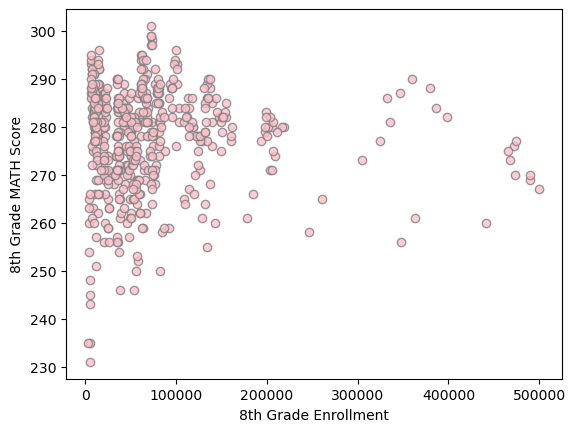

In [192]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(df['enroll_8'] , df['avg_math_8_score'], c = 'pink', alpha = 0.8, edgecolors = 'grey')
ax.set_xlabel('8th Grade Enrollment')
ax.set_ylabel('8th Grade MATH Score')

In [193]:
df['enroll_8'].corr(df['avg_math_8_score'])

-0.032232628404148256

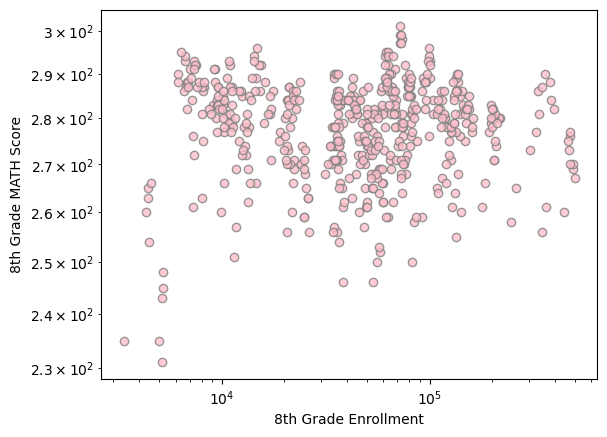

In [194]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(df['enroll_8'] , df['avg_math_8_score'], c='pink', alpha=0.8, edgecolors='grey')
ax.set_xlabel('8th Grade Enrollment')
ax.set_ylabel('8th Grade MATH Score')
ax.set_yscale('log')
ax.set_xscale('log')

<span style='color:red'>There are two plots above, the first one is 8th grade enrollment versus 8th grade MATH Score. We see most enrollment data is within 0 and 200000, so most of data is within left top corner. The correlation between these two variable is not that easy to see from this plot. The correlation between these two column is -0.032232628404148256, slightly negative coefficent. </span> 
    
<span style='color:red'>So we apply the log scale transformation to both variables, in the second plot. Now it shows a clear positive correlation between two. </span> 

**Visualization 2**

Text(0, 0.5, '8th Grade MATH Score')

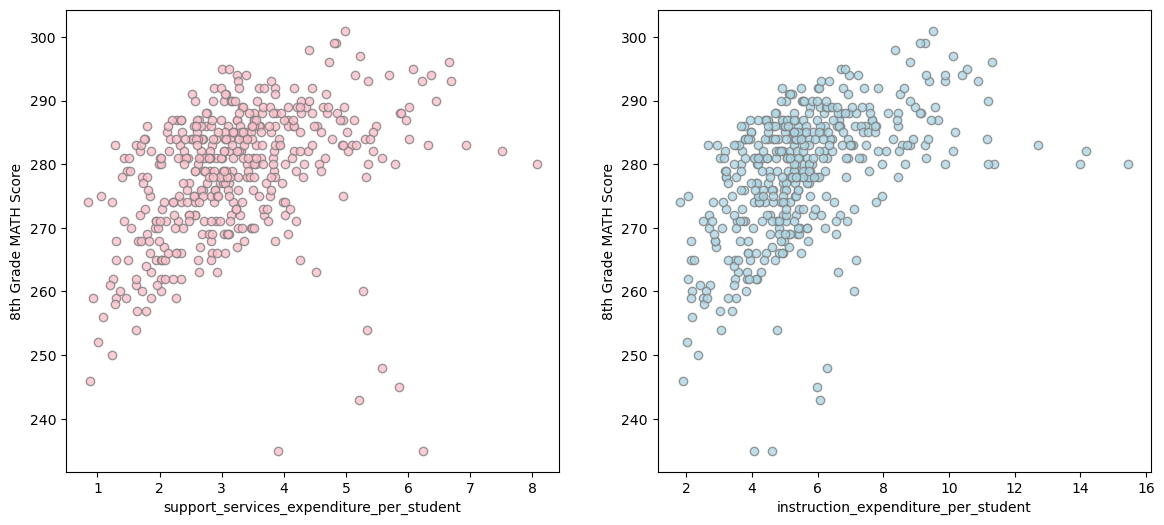

In [195]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].scatter(df['support_services_expenditure_per_student'] , df['avg_math_8_score'], c = 'pink', alpha = 0.8, edgecolors = 'grey')
ax[0].set_xlabel('support_services_expenditure_per_student')
ax[0].set_ylabel('8th Grade MATH Score')

ax[1].scatter(df['instruction_expenditure_per_student'] , df['avg_math_8_score'], c = 'lightblue', alpha = 0.8, edgecolors = 'grey')
ax[1].set_xlabel('instruction_expenditure_per_student')
ax[1].set_ylabel('8th Grade MATH Score')

<span style='color:red'> Based on the plot above, the support serivices expenditure per student is positively related to 8th grade math score. Generally, as expenditure increases, 8th grade math socre will also increase. But there are some outliers in the right bottom corner, even support services expenditure is high, these students still have low math score. We observe similar pattern when instruction_expenditure_per_student versus 8th grade math score. </span> 

In [196]:
import seaborn as sns

<AxesSubplot:>

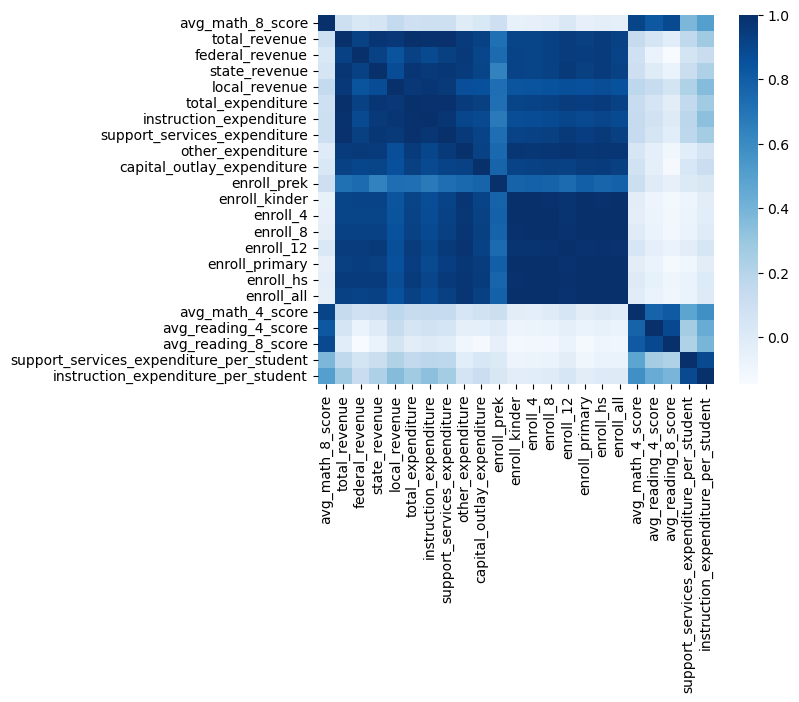

In [197]:
df_numeric = df[['avg_math_8_score', 'total_revenue', 'federal_revenue', 'state_revenue', 
                 'local_revenue', 'total_expenditure','instruction_expenditure', 
                 'support_services_expenditure','other_expenditure', 
                 'capital_outlay_expenditure', 'enroll_prek','enroll_kinder', 
                 'enroll_4', 'enroll_8', 'enroll_12', 'enroll_primary',
                 'enroll_hs', 'enroll_all', 'avg_math_4_score',
                 'avg_reading_4_score', 'avg_reading_8_score',
                 'support_services_expenditure_per_student', 
                'instruction_expenditure_per_student']]

corr = df_numeric .corr()
sns.heatmap(corr, cmap="Blues")

<span style='color:red'> We set our outcome variable as the first column (row): avg_math_8_score. According to this heatmap, deeper blue indicates a stronger relationship between two variables. We notice that avg_math_8_score has higher correlation with these following variable: avg_math_4_score, avg_reading_4_score, avg_reading_8_score, support_services_expenditure_per_student, and instruction_expenditure_per_student </span> 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
X = df[['enroll_8','avg_math_4_score','avg_reading_4_score','avg_reading_8_score', 
        'support_services_expenditure_per_student', 
        'instruction_expenditure_per_student']].dropna()
y = df.loc[X.index]['avg_math_8_score'] 

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [201]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [202]:
# create your model here
model = LinearRegression()

In [203]:
model.fit(X_train, y_train)

LinearRegression()

In [204]:
model.coef_

array([ 1.07157853e-06,  9.02281001e-01, -3.77184502e-01,  7.36659876e-01,
        1.29776830e-01, -5.35775883e-02])

In [205]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [206]:
print("R^2: " + str(model.score(X_test, y_test)))
print("Mean Error: " + str(np.mean(model.predict(X_test)-y_test)))

R^2: 0.9345582906806712
Mean Error: 0.535062271670286


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

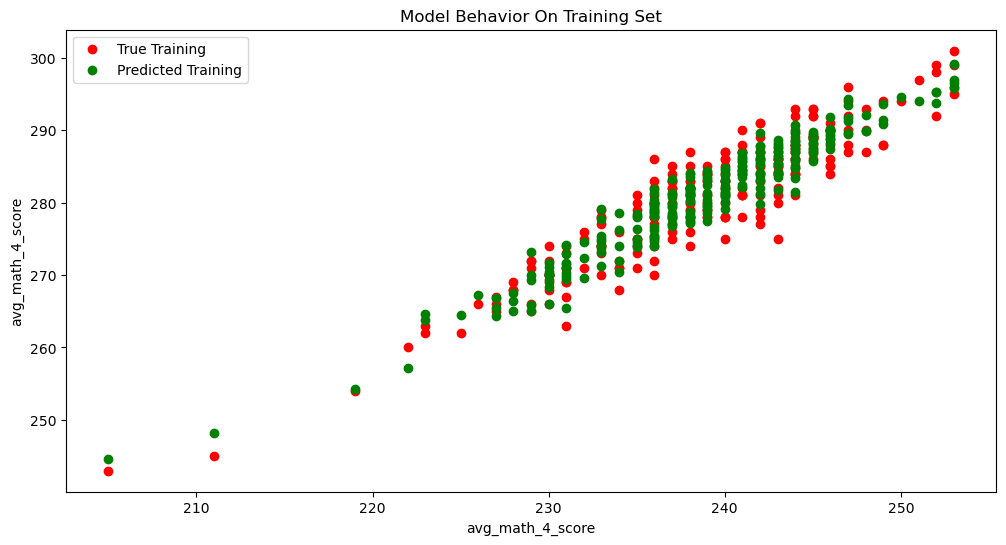

In [207]:
col_name = 'avg_math_4_score'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('avg_math_4_score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

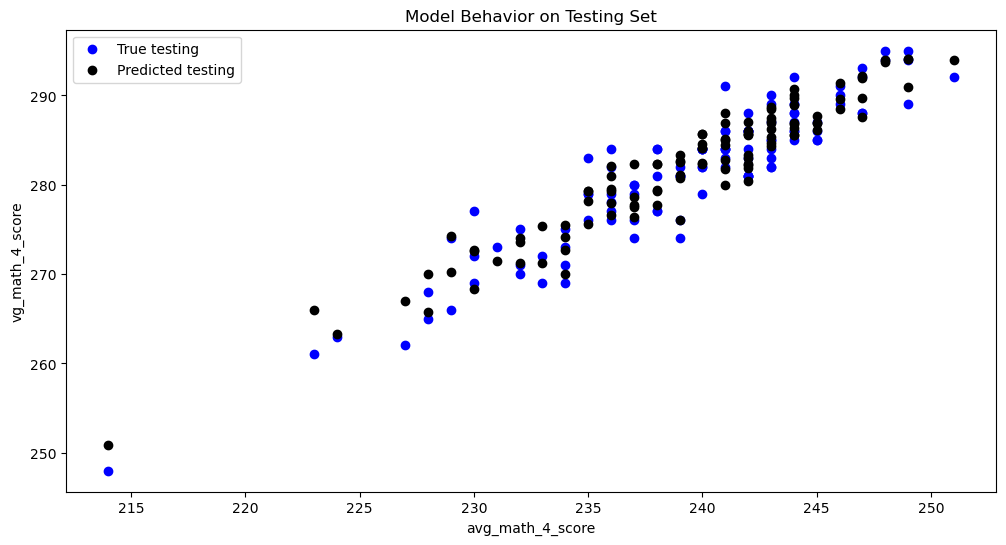

In [208]:
col_name = 'avg_math_4_score'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('vg_math_4_score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

<span style='color:red'> This is a very standard and simple data analysis workflow project. We clean the dataset, then create some useful variables, apply EDA to explore basic features of the dataset, then using simple linear regression model to find the relationship between average 8th grade math score and other parameters. Finally, we use evaluation metrics to see how our model perform. </span> 

<span style='color:red'> Based on EDA result, we notice several variables like: avg_math_4_score, avg_reading_4_score, avg_reading_8_score, support_services_expenditure_per_student, and instruction_expenditure_per_student, are somewhat related to our outcome variable (compared with others). This was testified by our model coefficient beta. It is a statistical measure in a regression model that determines the proportion of variance in the dependent variable (8th grade math score) that can be explained by the independent variable. It is also known as goodness of fit. R^2 of our model is 0.93, means that 93% of the variability observed in the 8th grade math score is explained by the regression model. Generally, a higher r-squared indicates more variability is explained by the model (not always). </span> 

<span style='color:red'> Lastly, based on the last two graphs copied from tutorials, this model shows well performance in both training and testing dataset, does not raise overfitting or underfitting problem.  </span> 